In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
from statsmodels.graphics.tsaplots import plot_acf

# Práctica 3: Prepocesamiento de Series de Tiempo

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye una serie de tiempo real. El dataset importado incluye cuatro series de tiempo de la ciudad de Delhi, India, desde el 1 de enero de 2013 al 1 de enero de 2017 en muestreos diarios. Las series de tiempo incluidas son:

- __meantemp__: Temperatura promedio del día.
- __humidity__: Humedad promedio del día.
- __wind_speed__: Velocidad promedio del viento en el día.
- __meanpressure__: Presión promedio del día.

Este conjunto de datos no contiene datos nulos, por lo que no es necesario realizar una imputación dedatos.

In [3]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["date"] = pd.to_datetime(df["date"])
df.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


## Asignación 1 &#x1F625;

La serie de tiempo __meanpressure__ contiene outliers. Analice la serie de tiempo y con base en su análisis, sustituya los outliers por valores válidos.

Text(0.5, 1.0, 'Datos con outliers:')

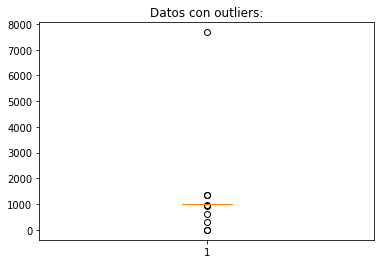

In [4]:
# Meanpressure plot
fig, ax = plt.subplots(nrows = 1)
ax.boxplot(df.meanpressure)
ax.set_title('Datos con outliers:')

<function matplotlib.pyplot.show(close=None, block=None)>

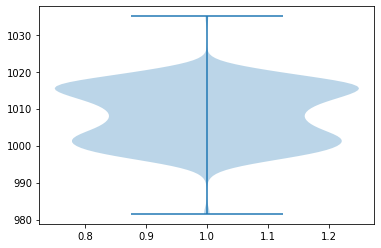

In [5]:
# Calculamos los cuartiles correspondientes
qs = df.meanpressure.quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

# Definimos limite inferior y superior
iqr = q3 - q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Reemplazamos los valores
df.meanpressure = np.where(df.meanpressure > iqr_lim_sup,
         iqr_lim_sup, df.meanpressure)
df.meanpressure = np.where(df.meanpressure<iqr_lim_inf,
                 iqr_lim_inf, df.meanpressure)

# Ploteamos el resultado
plt.violinplot(df.meanpressure)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

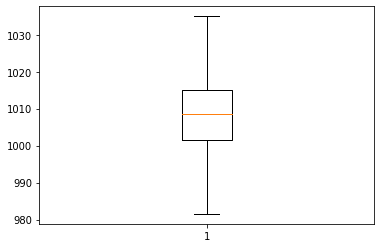

In [6]:
# Ploteamos el resultado con boxplot
plt.boxplot(df.meanpressure)
plt.show

## Asignación 2 &#x1F625;

Normalice todas las series de tiempo para que tengan media cero y varianza 1.  Imprima la descripción del dataframe para validar.

In [7]:
# Inicializamos un dataframe vacio para almacenar los valores normalizados y cumplor con el primer punto e imprimir el dataframe para validar
dfvacio = pd.DataFrame()
dfvacio['date'] = df.date


for col in df.columns:  # Se normaliza columna por columna
    if col != 'date':# Se omite la variable "fecha" 
        dfvacio[col] = ((df[col] - np.mean(df[col])) / np.std(df[col]))

dfvacio.describe()

,date,meantemp,humidity,wind_speed,meanpressure
count,1462,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,2015-01-01 12:00:00,-1.458022e-17,1.968330e-16,-1.944029e-16,3.022966e-15
min,2013-01-01 00:00:00,-2.654044e+00,-2.824109e+00,-1.491699e+00,-3.463587e+00
25%,2014-01-01 06:00:00,-9.037230e-01,-6.201833e-01,-7.296443e-01,-8.611749e-01
50%,2015-01-01 12:00:00,3.020541e-01,1.105528e-01,-1.273107e-01,4.535292e-02
75%,2016-01-01 18:00:00,7.909894e-01,6.828386e-01,5.342114e-01,8.737667e-01
max,2017-01-01 00:00:00,1.799551e+00,2.340044e+00,7.766988e+00,3.476179e+00
std,NaN,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00


## Asignación 3 &#x1F625;

Entrene una regresión lineal para predecir el valor de __meantemp__ utilizando las series de tiempo __humidity__, __wind_speed__ y __meanpressure__. Use la función _numpy.linalg.lstsq_ para esto. Una vez entrenada la regresión, grafique la serie de tiempo __meantemp__ junto con la serie de tiempo de las predicciones del modelo.

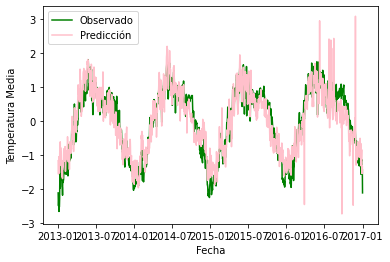

In [8]:
X = dfvacio[['humidity', 'wind_speed', 'meanpressure']].values
y = dfvacio['meantemp'].values

# Comenzamos el entrenamiento del modelo

w, _, _, _ = np.linalg.lstsq(X, y, rcond=-1)
y_pred = np.dot(X, w) # Se calculan las predicciones del modelo con las variables independientes

# Ploteamos meantemp con el modelo para ver la serie de tiempo
plt.plot(dfvacio.date, dfvacio.meantemp, label='Observado', color = "green")
plt.plot(dfvacio.date, y_pred, label='Predicción', color = "pink")
plt.xlabel('Fecha')
plt.ylabel('Temperatura Media')
plt.legend()
plt.show()

## Asignación 4 &#x1F643;

La serie de tiempo __meantemp__ presenta ciclos por temporadas y una ligera tendencia creciente. Entrene una regresión lineal donde las variables independientes estén en función del tiempo que permita replicar estas tendencias. En una sola gráfica imprima la serie de tiempo __meantemp__, la gráfica de la tendencia (predicciones del modelo) y la gráfica sin tendencia, es decir, la resta de la serie de tiempo __meantemp__ y las predicciones del modelo (residuales).

Nota: Utilice una frecuencia fija de $1/365$ para replicar los ciclos.

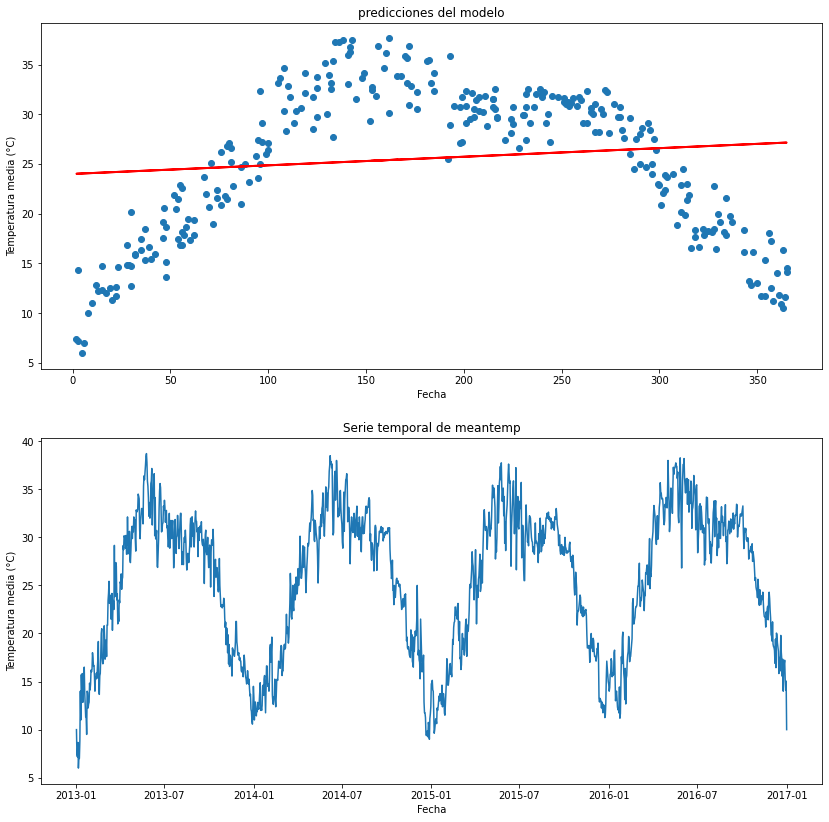

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar el dataset en un DataFrame de pandas
data = pd.read_csv('DailyDelhiClimateTrain.csv')

# Convertir la columna 'date' en un objeto datetime y establecerla como el índice del DataFrame
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Agregar una columna 'dayofyear' que represente el día del año
data['dayofyear'] = data.index.dayofyear


# Crear una matriz de características que contenga las variables independientes (en este caso, solo 'dayofyear')
X = data[['dayofyear']].values

# Crear un vector de destino que contenga la variable dependiente ('meantemp')
y = data['meantemp'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y ajustar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba y calcular el error cuadrático medio (MSE)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
 
fig, axs = plt.subplots(2, 1, figsize=(14, 14))


#Graficar las predicciones del modelo
axs[0].plot(X_test, y_test, 'o')
axs[0].plot(X_test, y_pred, 'r', linewidth=2)
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Temperatura media (°C)')
axs[0].set_title('predicciones del modelo')
# Graficar la serie temporal de meantemp para identificar los ciclos por temporadas y la tendencia creciente
axs[1].plot(data['meantemp'])
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Temperatura media (°C)')
axs[1].set_title('Serie temporal de meantemp')

plt.show()

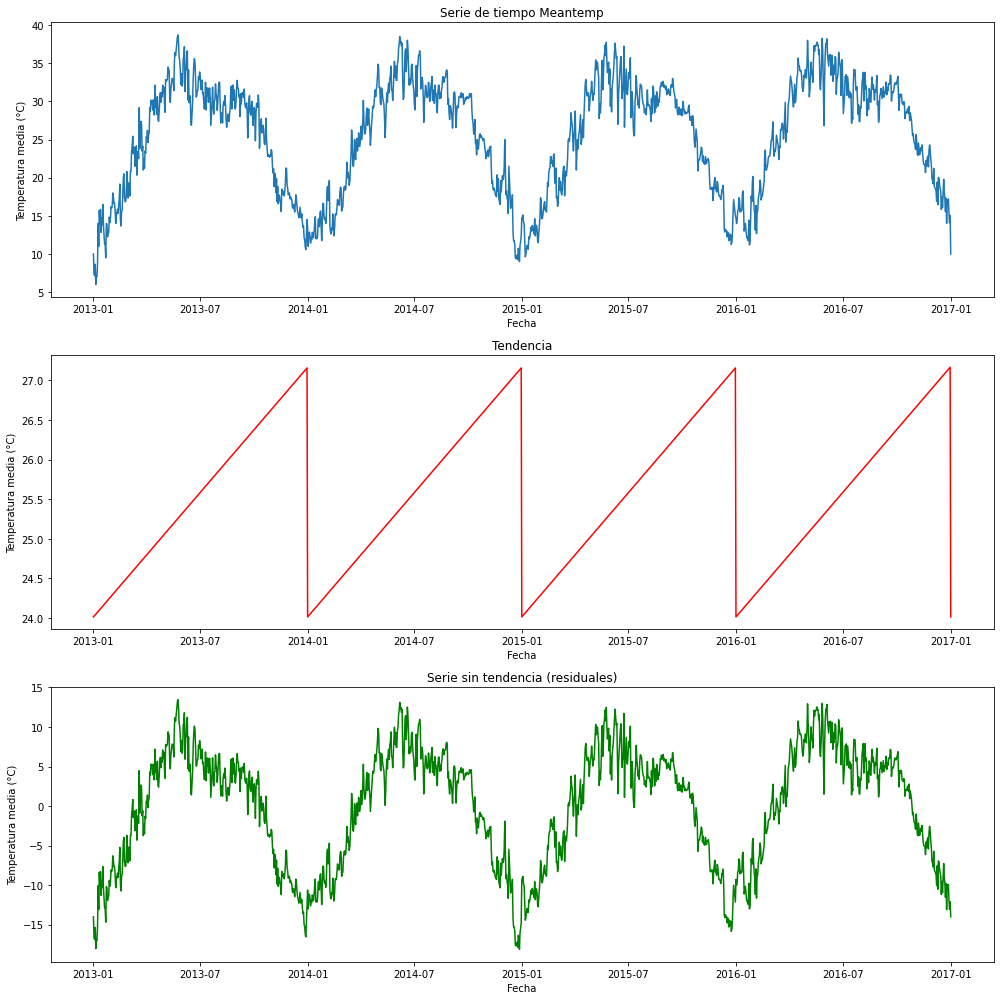

In [10]:
# Calcular las predicciones del modelo para todo el conjunto de datos
y_pred = regressor.predict(X)

# Calcular los residuales (diferencia entre la serie de tiempo y las predicciones del modelo)
residuales = y - y_pred

# Graficar la serie de tiempo meantemp, la tendencia y la serie sin tendencia
fig, axs = plt.subplots(3, 1, figsize=(14, 14))

# Serie de tiempo meantemp
axs[0].plot(data.index, data['meantemp'])
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Temperatura media (°C)')
axs[0].set_title('Serie de tiempo Meantemp')

# Tendencia
axs[1].plot(data.index, y_pred, color='red')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Temperatura media (°C)')
axs[1].set_title('Tendencia')

# Serie sin tendencia (residuales)
axs[2].plot(data.index, residuales, color='green')
axs[2].set_xlabel('Fecha')
axs[2].set_ylabel('Temperatura media (°C)')
axs[2].set_title('Serie sin tendencia (residuales)')

plt.tight_layout()
plt.show()

## Asignación 5 &#x1F643;

Elimine las tendencias de la serie de tiempo __meantemp__ utilizando diferencias de primero orden. Debe realizar dos diferencias, una para eliminar la tendencia creciente y otra para eliminar los ciclos por temporadas. Grafique la serie de tiempo de __meantemp__ junto con la serie de tiempo estacionaria.

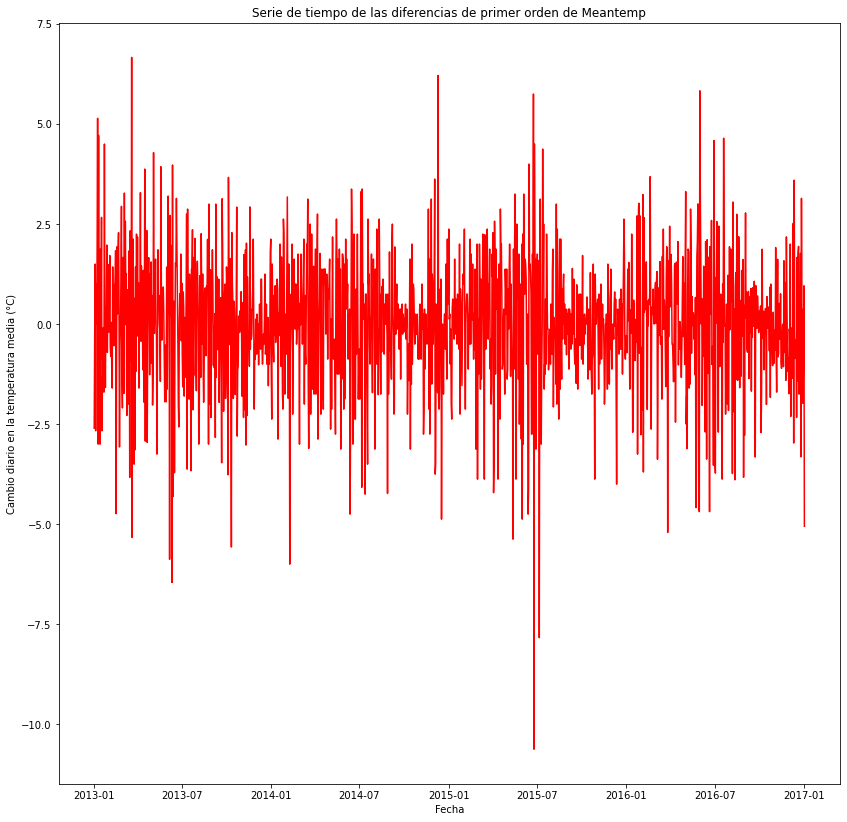

In [11]:
# Calcular la serie de tiempo de las diferencias de primer orden
deltas = data['meantemp'].diff()

# Graficar la serie de tiempo de las diferencias de primer orden

#cambiar el tamaño de la figura
plt.figure(figsize=(14, 14))
plt.plot(deltas  , color='red')
plt.title('Serie de tiempo de las diferencias de primer orden de Meantemp')
plt.xlabel('Fecha')
plt.ylabel('Cambio diario en la temperatura media (°C)')
plt.show()



## Asignación 6 &#x1F643;

Grafique el correlograma de la serie de tiempo __meantemp__ y el correlograma de __meantemp__ diferenciada (estacionaria). Utilice la función _plot_acf_ para graficar el correlograma.

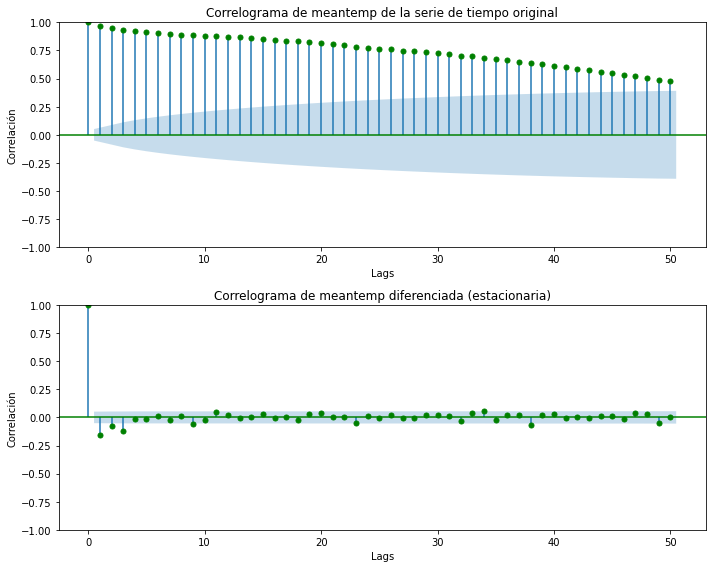

In [12]:
# Correlograma de meantemp

# Crear una figura con dos subplots
fig, axs = plt.subplots(2, 1, figsize =(10,8))

# Graficar el correlograma de la serie  de tiempo original
plot_acf(data['meantemp'].dropna(), lags=50, ax=axs[0], color = "green")
axs[0].set_title('Correlograma de meantemp de la serie de tiempo original')
axs[0].set_xlabel('Lags')
axs[0].set_ylabel('Correlación')


# Correlograma de meantemp diferenciada (estacionaria)
plot_acf(deltas.dropna(), lags = 50, ax = axs [1], color = "green")
axs[1].set_title('Correlograma de meantemp diferenciada (estacionaria)')
axs[1].set_xlabel('Lags')
axs[1].set_ylabel('Correlación')

plt.tight_layout()
plt.show()

